In [1]:
#%matplotlib notebook  
from matplotlib import pyplot as plt
import numpy as np
import db
import pasttrec_ctrl as ptc
import json
import baseline_calib
import tdc_daq as td
import matplotlib.pyplot as plt
import time

from my_utils import *
data_dir = make_data_dir()
set_width_max_of_jupyterpad()

import ROOT



Welcome to JupyROOT 6.14/04


['0010', '0101']


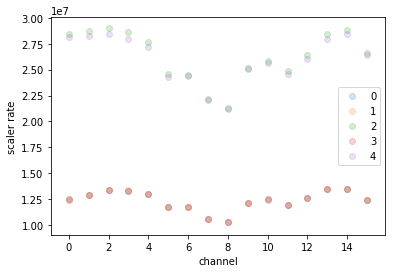

28 boards to activate, sequence of activation, boards list: 
['0010', '0101', '0011', '0002', '0009', '0004', '0015', '0027', '0016', '0025', '0017', '0026', '0022', '0020', '0003', '0023', '0030', '0014', '0021', '0029', '0018', '0104', '0103', '0006', '0008', '0102', '0028', '0005']


In [2]:
#db.board_list()
# measure_board_list = ['0021', '0014', '0003', '0018', '0022', '0026', '0025', '0027', '0002', '0007', '0004'] #layer2
# measure_board_list = ['0023', '0030', '0029', '0020', '0017', '0016', '0015', '0011', '0010', '0009'] # layer 3
#measure_board_list = ['0021', '0014', '0003', '0018', '0022', '0026', '0025', '0027', '0002', '0007', '0004', '0023', '0030', '0029', '0020', '0017', '0016', '0015', '0011', '0010', '0009']
measure_board_list = ['0010','0101']
print(measure_board_list)
name = "0010"
channel_to_analyse = 5
# good reference board longer wires  "0022", 0004, !! 0021!! (shortest wires)
# not working boards: 0025, 
# no dependence 0027, 0002
# step at 6 boards then constant 003
trend_scaler_list = []
for i in range(0,5):
    #time.sleep(1)
    db.unset_standby_board(name)
    ptc.init_board_by_name(name,10,i,15)
    scaler_list = []
    #ptc.reset_board_by_name("0017")
    #ptc.init_active_boards()
    scaler_list = td.scaler_rate_of_board(name,0.2)
    trend_scaler_list += [scaler_list]
    plt.scatter(range(0,16),scaler_list,alpha=0.2,label = "{:d}".format(i))
    plt.legend()
    plt.xlabel("channel")
    plt.ylabel("scaler rate")
plt.show()

from cw_pasttrec_functions import *
## define sequence of boards to activate in scan.
#boards_scan_list = generate_neighbouring_FPC_board_list(name)
boards_scan_list = generate_neighbouring_w_board_list(name)


# db.dump_db_to_root("ee.root")    
# for my_board in db.nostandby_board_list():
#     print(my_board)

In [3]:
## scan threshold of an single board as function of peaking time, gain, number of other boards switched on

import ROOT

# rootMeanSquare :: [Num] -> Float
def rootMeanSquare(xs):
    return sqrt(reduce(lambda a, x: a + x * x, xs, 0) / len(xs))
def MeanArrays(xs,ys):
    return np.dot(xs,ys)/sum(ys)


#for my_board in db.board_list():
#  db.unset_standby_board(my_board) #name = "0029" #PASSTEC board id (inside )

c = ROOT.TCanvas("c","The Canvas Title",640,480); c.cd();
ROOT.gStyle.SetOptFit(1)
n_wires = 162
mg = ROOT.TMultiGraph()
mg2 = ROOT.TMultiGraph()
gr = [1, 2, 3, 4]
gr2 = [1, 2, 3, 4]
dependency_list = []

index_l = 0
#for p in [1,2,4]:  
# boards_scan_list.remove('0004')
# boards_scan_list.remove('0002')
# boards_scan_list.remove('0015')
boards_scan_list = db.board_list()
print(boards_scan_list)
for my_board in db.board_list():
            db.set_standby_board(my_board)
for p in range(0,len(boards_scan_list)): 
    # switch on on board after another (unset standby):
    for my_board in db.board_list():
        if my_board == boards_scan_list[p]:
            db.unset_standby_board(my_board)
#         else:
#             db.set_standby_board(my_board)
        
    for name in measure_board_list: 
        
        db.unset_standby_board(name)
        td.enable_tdc_channels_of_active_boards()
        ptc.init_active_boards()
        print("board switched on: ", boards_scan_list[p])
         # vary gain:
    #     print("gain: ", p)
    #     ptc.init_board_by_name(name,10,p,15)  # init_boards_by_name(board_list,pktime=-1,gain=-1,threshold=-1):
        print("number of boards switched on: ", p)
       # ptc.init_board_by_name(name,10,2,15)  # init_boards_by_name(board_list,pktime=-1,gain=-1,threshold=-1):    
        #time.sleep(60)
        dependency_list += [ p ]

        baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)
        calib       = db.get_calib_json_by_name(name)
        dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
        board_info  = db.find_board_by_name(name)

        #print(json.dumps(dummy_calib,indent=2, sort_keys=True))
        tsbl_scan_raw = dummy_calib["tsbl_scan_raw"]
        tsbl_range    = dummy_calib["tsbl_range"]

        #scaler_list = []
        #scaler_list = td.scaler_rate_of_board(name,0.2)
        root_name = "/workdir/data/noise/noise_" + name + "_scan0" + str(p) + ".root"
        print(root_name)
        db.dump_db_to_root_board(root_name,name)


['0014', '0005', '0021', '0022', '0025', '0003', '0026', '0027', '0008', '0004', '0002', '0101', '0029', '0030', '0028', '0023', '0020', '0017', '0016', '0006', '0015', '0010', '0011', '0009', '0013', '0018', '0104', '0102', '0105', '0103']
board switched on:  0014
number of boards switched on:  0
/workdir/data/noise/noise_0010_scan00.root
scanning keys of board: 0010
dumping data of board: 0010
board switched on:  0014
number of boards switched on:  0
/workdir/data/noise/noise_0101_scan00.root
scanning keys of board: 0101
dumping data of board: 0101
board switched on:  0005
number of boards switched on:  1
/workdir/data/noise/noise_0010_scan01.root
scanning keys of board: 0010
dumping data of board: 0010
board switched on:  0005
number of boards switched on:  1
/workdir/data/noise/noise_0101_scan01.root
scanning keys of board: 0101
dumping data of board: 0101
board switched on:  0021
number of boards switched on:  2
/workdir/data/noise/noise_0010_scan02.root
scanning keys of board: 00

board switched on:  0018
number of boards switched on:  25
/workdir/data/noise/noise_0010_scan025.root
scanning keys of board: 0010
dumping data of board: 0010
board switched on:  0018
number of boards switched on:  25
/workdir/data/noise/noise_0101_scan025.root
scanning keys of board: 0101
dumping data of board: 0101
board switched on:  0104
number of boards switched on:  26
/workdir/data/noise/noise_0010_scan026.root
scanning keys of board: 0010
dumping data of board: 0010
board switched on:  0104
number of boards switched on:  26
/workdir/data/noise/noise_0101_scan026.root
scanning keys of board: 0101
dumping data of board: 0101
board switched on:  0102
number of boards switched on:  27
/workdir/data/noise/noise_0010_scan027.root
scanning keys of board: 0010
dumping data of board: 0010
board switched on:  0102
number of boards switched on:  27
/workdir/data/noise/noise_0101_scan027.root
scanning keys of board: 0101
dumping data of board: 0101
board switched on:  0105
number of board

>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reache

/workdir/data/noise/noise_0010_scan00.root
channel 5, noise threshold half max (DAC) = 13.25
/workdir/data/noise/noise_0010_scan01.root
channel 5, noise threshold half max (DAC) = 13.04
/workdir/data/noise/noise_0010_scan02.root
channel 5, noise threshold half max (DAC) = 13.03
/workdir/data/noise/noise_0010_scan03.root
channel 5, noise threshold half max (DAC) = 13.04
/workdir/data/noise/noise_0010_scan04.root
channel 5, noise threshold half max (DAC) = 12.89
/workdir/data/noise/noise_0010_scan05.root
channel 5, noise threshold half max (DAC) = 12.94
/workdir/data/noise/noise_0010_scan06.root
channel 5, noise threshold half max (DAC) = 12.93
/workdir/data/noise/noise_0010_scan07.root
channel 5, noise threshold half max (DAC) = 12.86
/workdir/data/noise/noise_0010_scan08.root
channel 5, noise threshold half max (DAC) = 12.96
/workdir/data/noise/noise_0010_scan09.root
channel 5, noise threshold half max (DAC) = 13.30
/workdir/data/noise/noise_0010_scan010.root
/workdir/data/noise/noise_

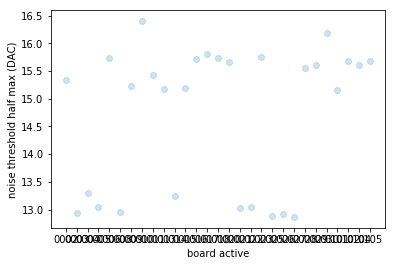

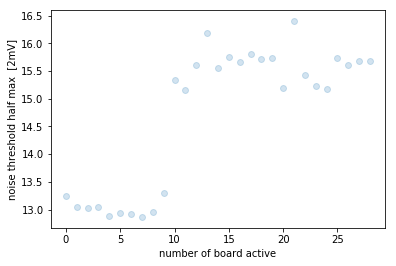

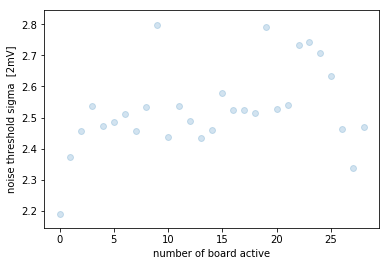

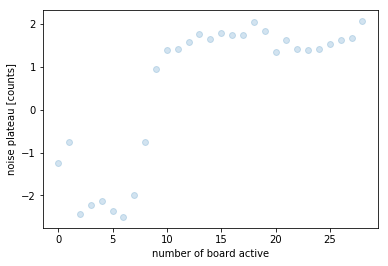

0010
/workdir/data/noise/noise_0101_scan00.root
channel 5, noise threshold half max (DAC) = 21.39
/workdir/data/noise/noise_0101_scan01.root
channel 5, noise threshold half max (DAC) = 21.49
/workdir/data/noise/noise_0101_scan02.root
channel 5, noise threshold half max (DAC) = 21.56
/workdir/data/noise/noise_0101_scan03.root
channel 5, noise threshold half max (DAC) = 21.60
/workdir/data/noise/noise_0101_scan04.root
channel 5, noise threshold half max (DAC) = 21.58
/workdir/data/noise/noise_0101_scan05.root
channel 5, noise threshold half max (DAC) = 21.56
/workdir/data/noise/noise_0101_scan06.root
channel 5, noise threshold half max (DAC) = 21.60
/workdir/data/noise/noise_0101_scan07.root
channel 5, noise threshold half max (DAC) = 21.61
/workdir/data/noise/noise_0101_scan08.root
channel 5, noise threshold half max (DAC) = 21.78
/workdir/data/noise/noise_0101_scan09.root
channel 5, noise threshold half max (DAC) = 20.34
/workdir/data/noise/noise_0101_scan010.root
channel 5, noise thre

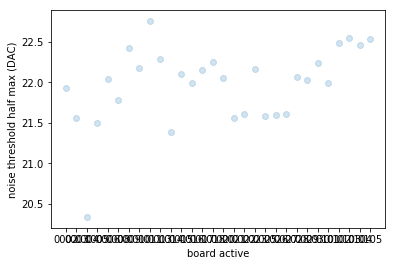

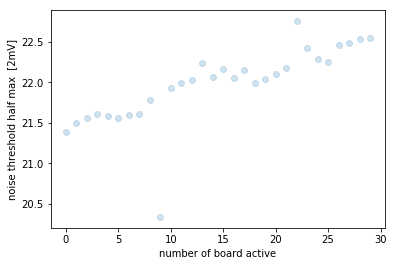

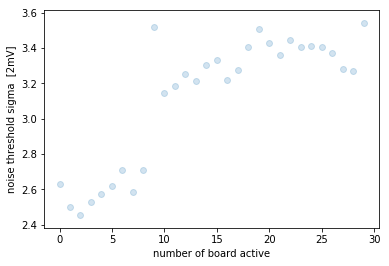

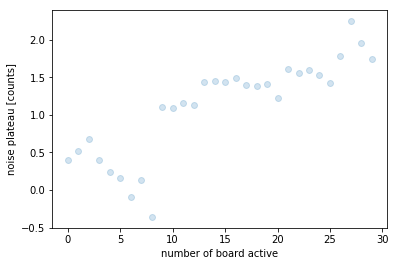

0101


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /workdir/data/noise/fit/0010/noiseFit_lay3_wire133_scan000.png has been created
Info in <TCanvas::Print>: png file /workdir/data/noise/fit/0010/noiseFit_lay3_wire133_scan001.png has been created
Info in <TCanvas::Print>: png file /workdir/data/noise/fit/0010/noiseFit_lay3_wire133_scan002.png has been created
Info in <TCanvas::Print>: png file /workdir/data/noise/fit/0010/noiseFit_lay3_wire133_scan003.png has been created
Info in <TCanvas::Print>: png file /workdir/data/noise/fit/0010/noiseFit_lay3_wire133_scan004.png has been created
Info in <TCanvas::Print>: png file /workdir/data/noise/fit/0010/noiseFit_lay3_wire133_scan005.png has been created
Info in <TCanvas::Print>: png file /workdir/data/noise/fit/0010/noiseFit_lay3_wire133_scan006.png has been created
Info in <TCanvas::Print>: png file /workdir/data/noise/fi

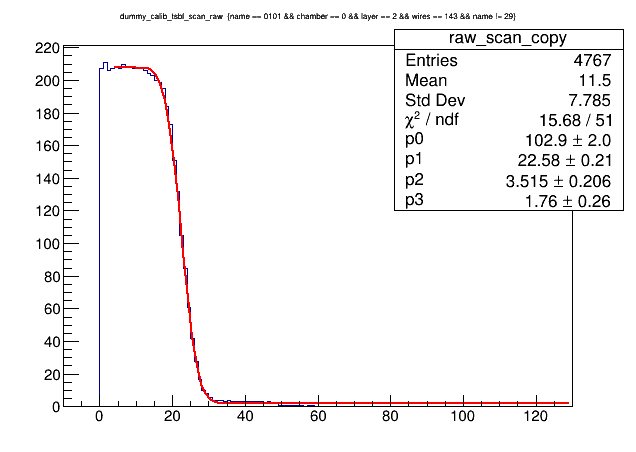

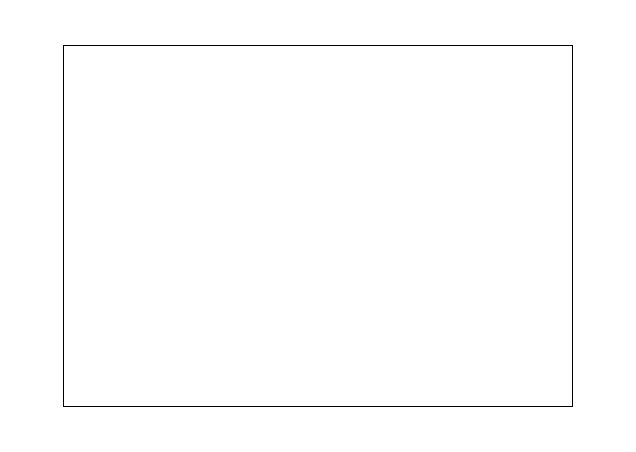

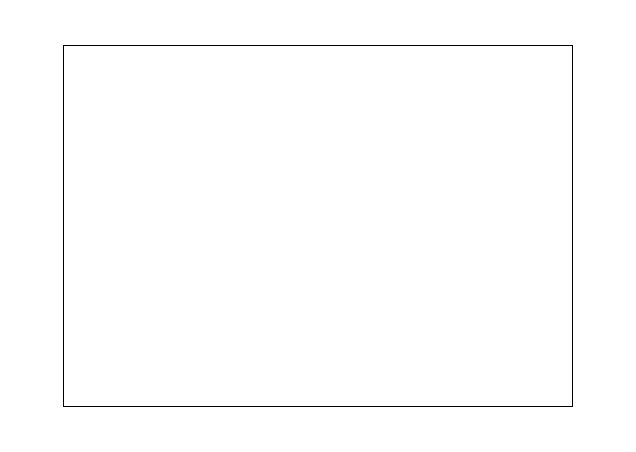

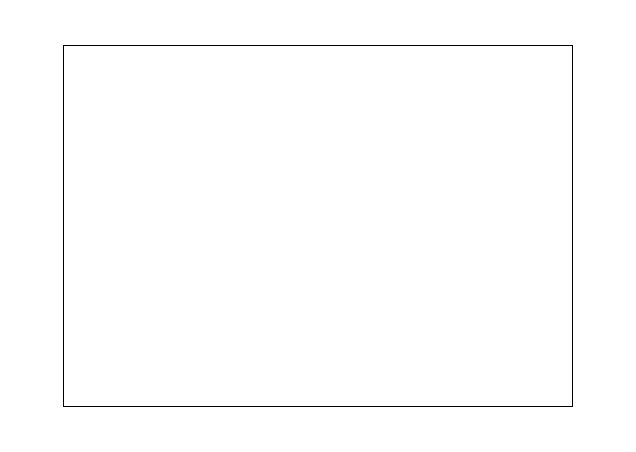

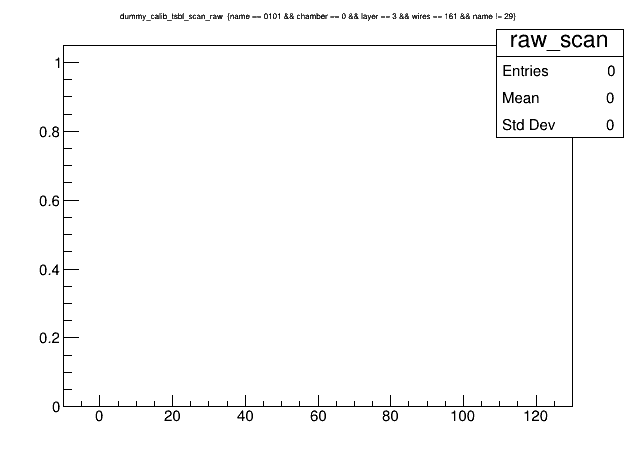

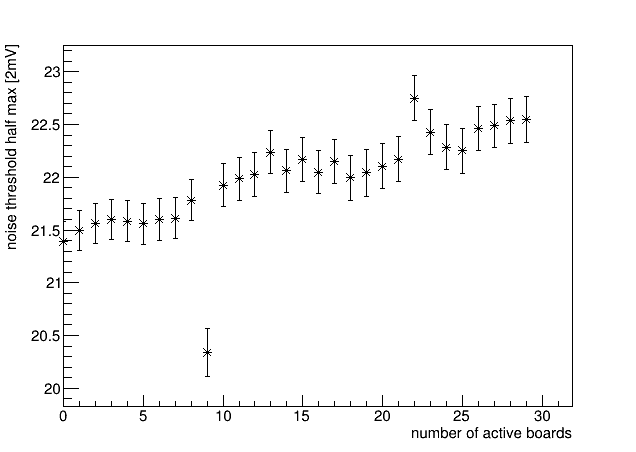

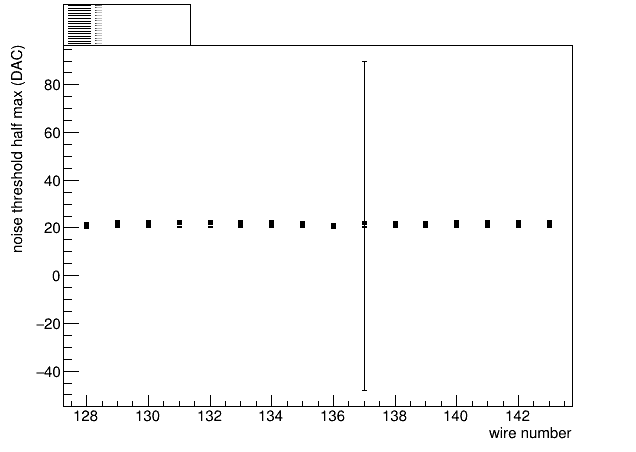

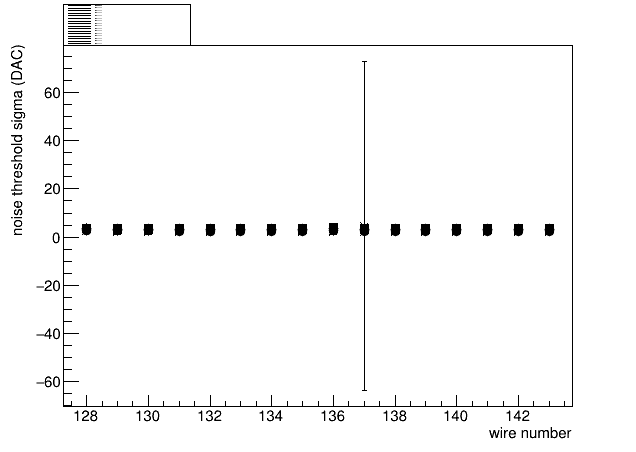

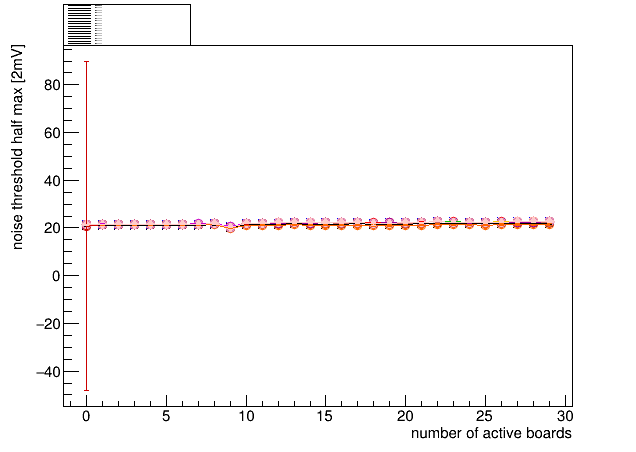

In [4]:
gif_out_list = []
import root_fit as fit
os.system("rm -rf {:s}/*".format("/workdir/data/noise/fit"))

for name in measure_board_list: 
    fit_dir = "/workdir/data/noise/fit/{:s}".format(name)
    os.mkdir(fit_dir)
    gif_out_list += [fit_dir]
    color_contrast_array = [1,632,600,417,800,616,401,880,807,633,634,626,797,617,618,622]
    c = ROOT.TCanvas("c","The Canvas Title",640,480); c.cd();
    ROOT.gStyle.SetOptFit(1)
    n_wires = 162
    mg = ROOT.TMultiGraph()
    mg2 = ROOT.TMultiGraph()
    mgDep = ROOT.TMultiGraph()
    legend = ROOT.TLegend(0.1,0.9,0.3,0.99);
    gr = [1, 2, 3, 4, 5, 6,1, 2, 3, 4, 5, 6,1, 2, 3, 4, 5, 6,1, 2, 3, 4, 5, 6,1, 2, 3, 4, 5, 6]
    gr2 = [1, 2, 3, 4, 5, 6,1, 2, 3, 4, 5, 6,1, 2, 3, 4, 5, 6,1, 2, 3, 4, 5, 6,1, 2, 3, 4, 5, 6]
    grDep = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    dependency_list = []
    c = ROOT.TCanvas("c","The Canvas Title",640,480); c.cd();
    index_l = -1
    # for p in [1,2,4]:   # PASTTREC gain scan
    #for p in [1,2,4]:   # PASTTREC peakingtime scan
    gr3 = ROOT.TGraphErrors(); 
    noise_by_dependency_list = [] 
    noise_by_dependency_list_sigma = []
    noise_by_dependency_list_offset = []
    
    for index_channel in range(0,16): 
        grDep[index_channel] = ROOT.TGraphErrors(); 
        grDep[index_channel].SetMarkerStyle(3+index_channel);
        grDep[index_channel].SetMarkerColor(color_contrast_array[index_channel]); 
        grDep[index_channel].SetLineColor(color_contrast_array[index_channel]);   
    canID = 0
    for p in range(0,len(boards_scan_list)):
#     for p in range(7,9):        
        canID += 1
        cscan = ROOT.TCanvas("cscan" + str(canID),"The Canvas Title",640,480); cscan.cd();
        dependency_list += [ p ]
        root_name = "/workdir/data/noise/noise_" + name + "_scan0" + str(p) + ".root"
        print(root_name)
        f = ROOT.TFile(root_name)
        dummy_tsbl_tree = f.Get("dummy_tsbl_tree")
        index_l += 1
        gr[index_l] = ROOT.TGraphErrors(); 
    #     gr[index_l].SetMarkerStyle(3+index_l); gr[index_l].SetMarkerColor(color_contrast_array[index_l]); 
    #     gr[index_l].SetLineStyle(2); gr[index_l].SetLineColor(color_contrast_array[index_l]);
        gr2[index_l] = ROOT.TGraphErrors(); gr2[index_l].SetMarkerStyle(3+index_l);

    #     gr2[index_l].SetMarkerStyle(3+index_l); gr2[index_l].SetMarkerColor(color_contrast_array[index_l]); 
    #     gr2[index_l].SetLineStyle(2); gr2[index_l].SetLineColor(color_contrast_array[index_l]);    
        for l in range(1,4):
    #         index_l += 1
            stdev_list = []
            sigma_list = []
            mean_list = []    
            sigma_list_err = []
            mean_list_err = []  
            ipoint = 0
            for i in range(0,n_wires):
               cscan.cd() 
           #dummy_tsbl_tree.Draw("dummy_calib_tsbl_scan_raw >> raw_scan(120,-20,100)","chamber == 0 && layer == 3 && name == 0015 && board_chan == " + str(i) ,"colz")
               ndata = dummy_tsbl_tree.Draw("dummy_calib_tsbl_scan_raw >> raw_scan(140,-10,130)","name == " + name + " && chamber == 0 && layer == " + str(l) + " && wires == " + str(i) + " && name != " + str(p) )  
               if (ndata > 0): 
                   raw_scan = f.Get("raw_scan")
                   results = fit.fit_scurve(raw_scan)
                   
                   raw_scan.DrawCopy()
                   cscan.Draw()
#                    cscan.Update()
                   fit_picture_file = fit_dir+"/noiseFit_lay" + str(l) +"_wire{:03d}_scan{:03d}".format(i,p) +".png"
#                    cscan.SaveAs(fit_picture_file)
                   gr[index_l].SetPoint(ipoint, i, np.double(results[2]))
                   gr[index_l].SetPointError(ipoint, 0, np.double(results[3]) )
                   gr2[index_l].SetPoint(ipoint, i, np.double(results[4]))
                   gr2[index_l].SetPointError(ipoint, 0, np.double(results[5]) )
                   if(ipoint == channel_to_analyse ):
#                        
                       cscan.SaveAs(fit_picture_file)
                       print("channel " + str(ipoint) + ", noise threshold half max (DAC) = {:.2f}".format(results[2]) )
                       gr3.SetPoint(p, p, np.double(results[2]))
                       gr3.SetPointError(p, 0, np.double(results[3]))
                       noise_by_dependency_list += [results[2]]
                       noise_by_dependency_list_sigma += [results[4]]
                       noise_by_dependency_list_offset += [results[6]]                        
                   grDep[ipoint].SetPoint(p, p, np.double(results[2]))
                   grDep[ipoint].SetPointError(p, 0, np.double(results[3]) )  
                   ipoint += 1

        mg.Add(gr[index_l]); gr[index_l].SetTitle("layer " + str(l) ); 
        mg2.Add(gr2[index_l]); gr2[index_l].SetTitle("layer " + str(l) );  
    for index_channel in range(0,16):   
        mgDep.Add(grDep[index_channel]); grDep[index_channel].SetTitle("wire " + str(index_channel) );  

       #legend->SetHeader("The Legend Title","C"); // option "C" allows to center the header
        legend.AddEntry(gr[index_l],"gain " + str(p),"lp")

    plt.scatter(boards_scan_list[:len(noise_by_dependency_list)],noise_by_dependency_list,alpha=0.2,label = "{:d}".format(1))
    plt.xlabel("board active")
    plt.ylabel("noise threshold half max (DAC)")
    plt.show()
    
    plt.scatter(range(0,len(noise_by_dependency_list)),noise_by_dependency_list,alpha=0.2,label = "{:d}".format(1))
    plt.xlabel("number of board active")
    plt.ylabel("noise threshold half max  [2mV]")
    plt.show()
    plt.scatter(range(0,len(noise_by_dependency_list)),noise_by_dependency_list_sigma,alpha=0.2,label = "{:d}".format(1))
    plt.xlabel("number of board active")
    plt.ylabel("noise threshold sigma  [2mV]")
    plt.show()
    plt.scatter(range(0,len(noise_by_dependency_list)),noise_by_dependency_list_offset,alpha=0.2,label = "{:d}".format(1))
    plt.xlabel("number of board active")
    plt.ylabel("noise plateau [counts]")
    plt.show()
    
    c3 = ROOT.TCanvas("c3"+name,"The Canvas Title",640,480); c3.cd();
    gr3.Draw("a*p")
    gr3.GetXaxis().SetTitle("number of active boards");
    gr3.GetYaxis().SetTitle("noise threshold half max [2mV]");
    #gr3.GetYaxis().SetRangeUser(0,40)
    gr3.Draw("a*p")
    c3.Draw()

    c1 = ROOT.TCanvas("c1"+name,"The Canvas Title",640,480); c1.cd();
    mg.Draw("ap")
    mg.GetXaxis().SetTitle("wire number");
    mg.GetYaxis().SetTitle("noise threshold half max (DAC)");
    #mg.GetYaxis().SetRangeUser(4,6)
    mg.Draw("ap")
    legend.Draw()
    c1.Draw()
    c2 = ROOT.TCanvas("c2"+name,"The Canvas Title",640,480); c2.cd();
    c2.cd();
    mg2.Draw("ap")
    mg2.GetXaxis().SetTitle("wire number");
    mg2.GetYaxis().SetTitle("noise threshold sigma (DAC)");
    #mg2.GetYaxis().SetRangeUser(-1,2)
    mg2.Draw("ap")
    legend.Draw()
    c2.Draw()

    cDep = ROOT.TCanvas("cDep"+name,"The Canvas Title",640,480); cDep.cd();
    mgDep.Draw("ap")
    mgDep.GetXaxis().SetTitle("number of active boards");
    mgDep.GetYaxis().SetTitle("noise threshold half max [2mV]");
    #mgDep.GetYaxis().SetRangeUser(-500,120)
    mgDep.Draw()
    legend.Draw()
    cDep.Draw()
    print(name)
    c1.SaveAs("board" + name + "_scan_mean.png")
    c2.SaveAs("board" + name + "_scan_sigma.png")
    c3.SaveAs("board" + name + "_noise_vs_no_active_boards.png")
    cDep.SaveAs("board" + name + "_noise_vs_no_active_boards_allchan.png") 

    

animating graphics in /workdir/data/noise/fit/0010
/workdir/data/noise/fit/0010


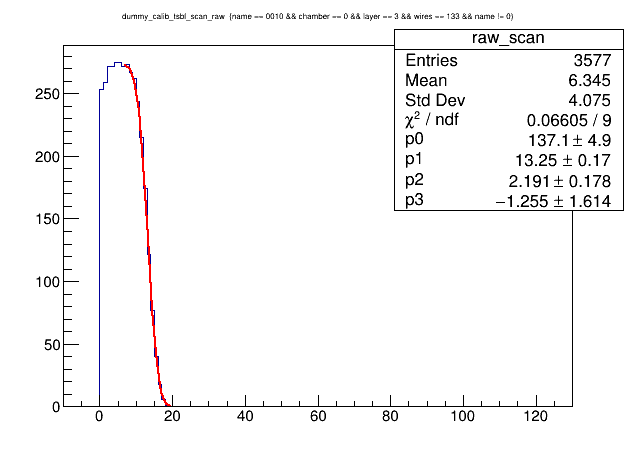

animating graphics in /workdir/data/noise/fit/0101
/workdir/data/noise/fit/0101


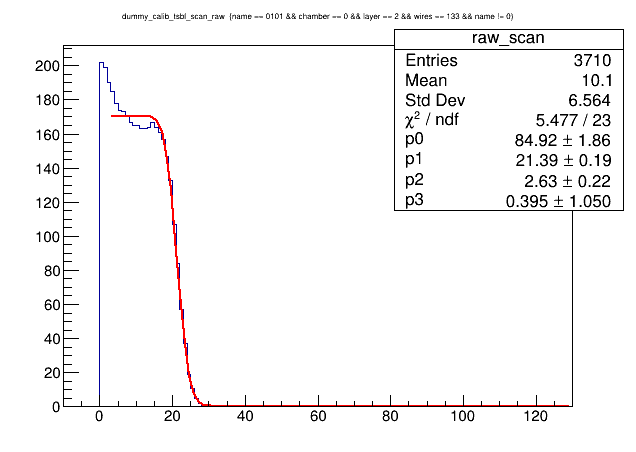

In [5]:
from IPython.display import Image
## display all single channel threshold scan fits into an animated gif

# gif_out_list = ["/workdir/data/noise/fit/"]
for subfolder in sorted(list(set(gif_out_list))):
        print("animating graphics in {:s}".format(subfolder))
        print(subfolder)
        os.system("cd  {:s}; convert -alpha off -delay 100 -loop 0 *png output.gif ".format(subfolder))
        with open('{:s}/output.gif'.format(subfolder),'rb') as f:
            display(Image(data=f.read(), format='png'))


In [6]:
archive(label="ufsd_fish_lowI_pAC_thr15")

001


Info in <TCanvas::SaveAs>: ROOT file board001_scan_mean.root has been created
Info in <TCanvas::SaveAs>: ROOT file board001_scan_sigma.root has been created
Info in <TCanvas::SaveAs>: ROOT file board001_noise_vs_no_active_boards.root has been created
Info in <TCanvas::SaveAs>: ROOT file board001_noise_vs_no_active_boards_allchan.root has been created


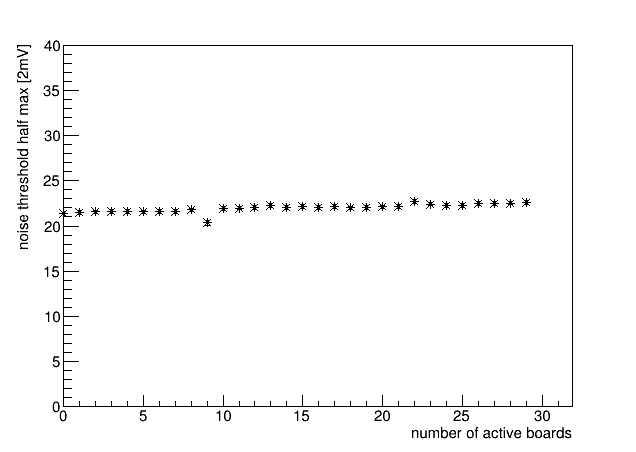

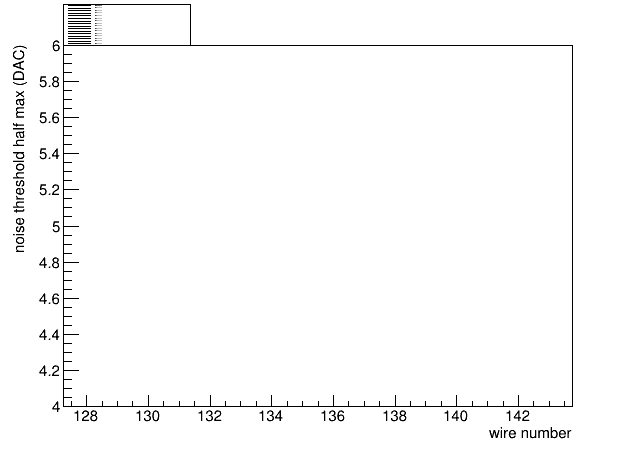

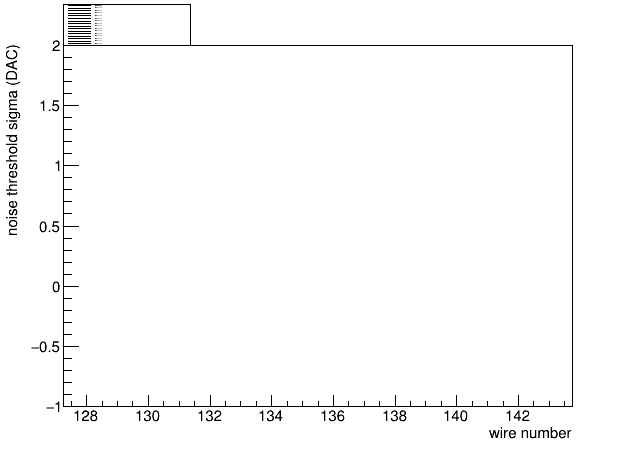

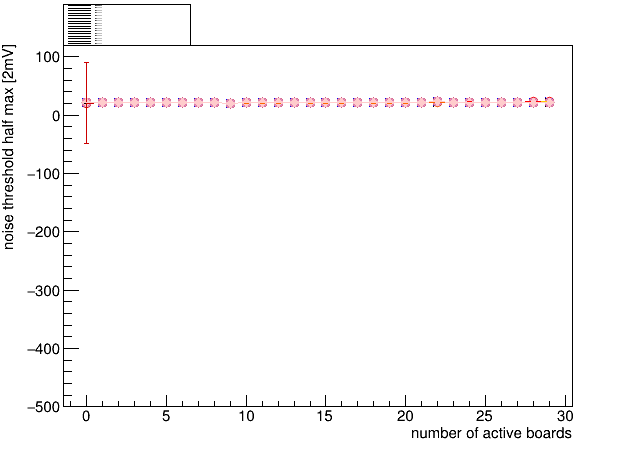

In [7]:
c3 = ROOT.TCanvas("c3","The Canvas Title",640,480); c3.cd();
gr3.Draw("a*p")
gr3.GetXaxis().SetTitle("number of active boards");
gr3.GetYaxis().SetTitle("noise threshold half max [2mV]");
gr3.GetYaxis().SetRangeUser(0,40)
gr3.Draw("a*p")
c3.Draw()

c1 = ROOT.TCanvas("c1","The Canvas Title",640,480); c1.cd();
mg.Draw("ap")
mg.GetXaxis().SetTitle("wire number");
mg.GetYaxis().SetTitle("noise threshold half max (DAC)");
mg.GetYaxis().SetRangeUser(4,6)
mg.Draw("ap")
legend.Draw()
c1.Draw()
c2 = ROOT.TCanvas("c2","The Canvas Title",640,480); c2.cd();
c2.cd();
mg2.Draw("ap")
mg2.GetXaxis().SetTitle("wire number");
mg2.GetYaxis().SetTitle("noise threshold sigma (DAC)");
mg2.GetYaxis().SetRangeUser(-1,2)
mg2.Draw("ap")
legend.Draw()
c2.Draw()

cDep = ROOT.TCanvas("cDep","The Canvas Title",640,480); cDep.cd();
mgDep.Draw("ap")
mgDep.GetXaxis().SetTitle("number of active boards");
mgDep.GetYaxis().SetTitle("noise threshold half max [2mV]");
mgDep.GetYaxis().SetRangeUser(-500,120)
mgDep.Draw()
legend.Draw()
cDep.Draw()

c1.SaveAs("board" + name + "_scan_mean.root")
c2.SaveAs("board" + name + "_scan_sigma.root")
c3.SaveAs("board" + name + "_noise_vs_no_active_boards.root")
cDep.SaveAs("board" + name + "_noise_vs_no_active_boards_allchan.root")    